# HOMEWORK PART 2-a

---

I've included in your emails MATLAB/Python code for solving (i) A reaction-diffusion system of equations,and (ii) The Kuramoto-Sivashinsky (KS) equation.

1. Train  a NN that can advance the solution from $t$ to $t + \Delta t$ for the KS equation.
2. Compare your evolution trajectories for your NN against using the ODE time-stepper provided with different initial conditions.

Let's consider the Kuramoto-Sivashinsky equation:

\begin{gather*}
u_t = -uu_x - u_{xx} - u_{xxxx} 
\end{gather*}

In [131]:
import numpy as np

import matplotlib.pyplot as plt

from tensorflow import keras
from keras import layers

from sklearn.model_selection import train_test_split

from Utility.KuraSiva import KS

plt.style.use('science')

In [170]:
N = 2048
tmax = 10
length = 30

x, u, t = KS(N, tmax, length)

X = u[:-1, :]
y = u[1:, :]

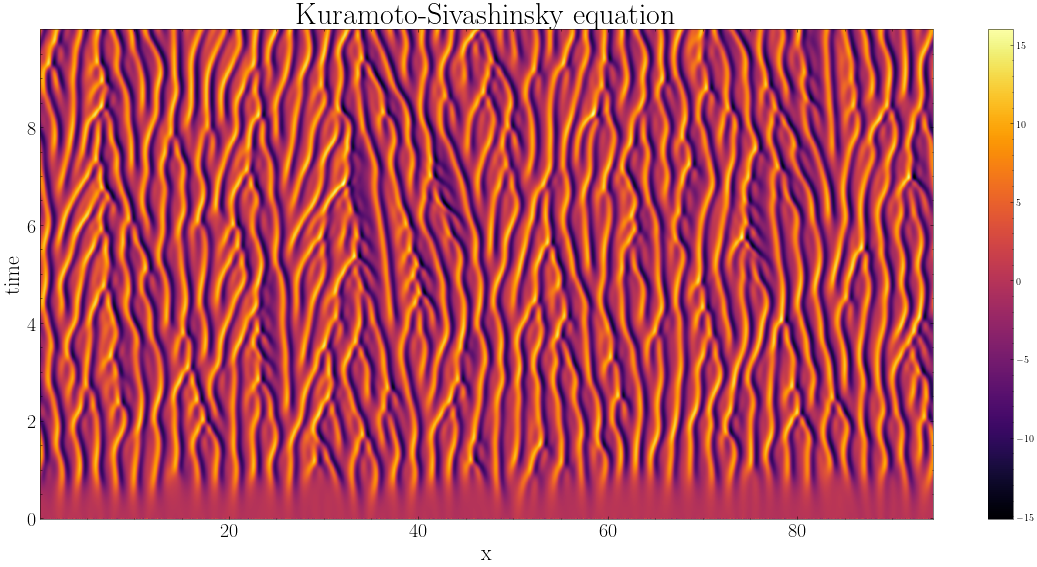

In [168]:
fig = plt.figure(figsize=(20, 9))
ax = plt.subplot(111)
XX, T = np.meshgrid(x, t)
im = ax.pcolormesh(XX, T, u, cmap='inferno', rasterized=True)
ax.set_title('Kuramoto-Sivashinsky equation', fontsize=30)
ax.set_ylabel('time', fontsize=22)
ax.set_xlabel('x', fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=20)
fig.colorbar(im)
plt.show()

## Build and Train the Neural Network

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=69)

In [200]:
NN = keras.models.Sequential()
NN.add(layers.Dense(10, input_dim = X_train.shape[1], activation='sigmoid', name='Input'))
NN.add(layers.Dense(10, activation='tanh', name = 'middle'))
NN.add(layers.Dense(X_train.shape[1], activation='linear', name = 'Output'))

NN.compile(loss='mse', optimizer='adam')

History = NN.fit(X_train, y_train, epochs=2000, verbose = 0) 

In [201]:
N = 2048
tmax = 10
length = 30

xf, uf, tf = KS(N, tmax, length)

X = u[:-1, :]
y = u[1:, :]

In [202]:
nn_pred = NN.predict(uf)

32/32 [==============================] - 0s 1ms/step


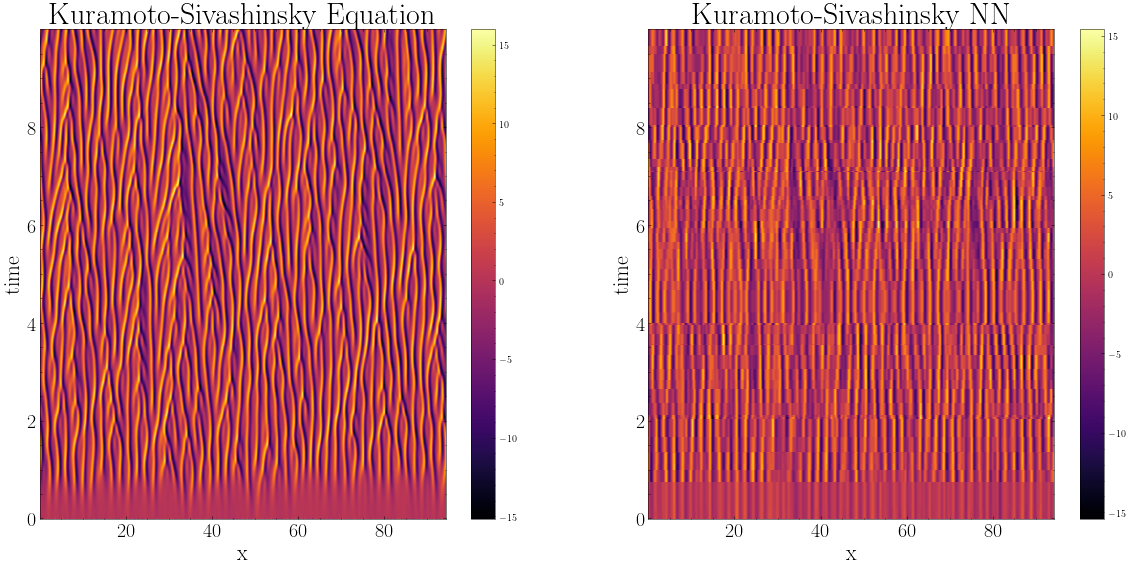

In [203]:
fig = plt.figure(figsize=(20, 9))
ax = plt.subplot(1,2,1)
XX, T = np.meshgrid(x, t)
im = ax.pcolormesh(XX,T, u, cmap='inferno', rasterized=True)
ax.set_title('Kuramoto-Sivashinsky Equation', fontsize=30)
ax.set_ylabel('time', fontsize=22)
ax.set_xlabel('x', fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=20)
fig.colorbar(im)

ax = plt.subplot(1,2,2)
XX2, T2 = np.meshgrid(xf, tf)
im2 = ax.pcolormesh(XX2, T2, nn_pred, cmap='inferno', rasterized=True)
ax.set_title('Kuramoto-Sivashinsky NN', fontsize=30)
ax.set_ylabel('time', fontsize=22)
ax.set_xlabel('x', fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=20)
fig.colorbar(im2)

plt.show()

## Compare your evolution trajectories for your NN against using the ODE time-stepper provided with different initial conditions.

Two different initial length used:

1. L = 10
2. L = 40

In [217]:
N = 1500
tmax = 10
length = [10, 40]

x1, u1, t1 = KS(N, tmax, length[0])
x2, u2, t2 = KS(N, tmax, length[1])

X1 = u1[:-1, :]
y1 = u1[1:, :]

X2 = u2[:-1, :]
y2 = u2[1:, :]

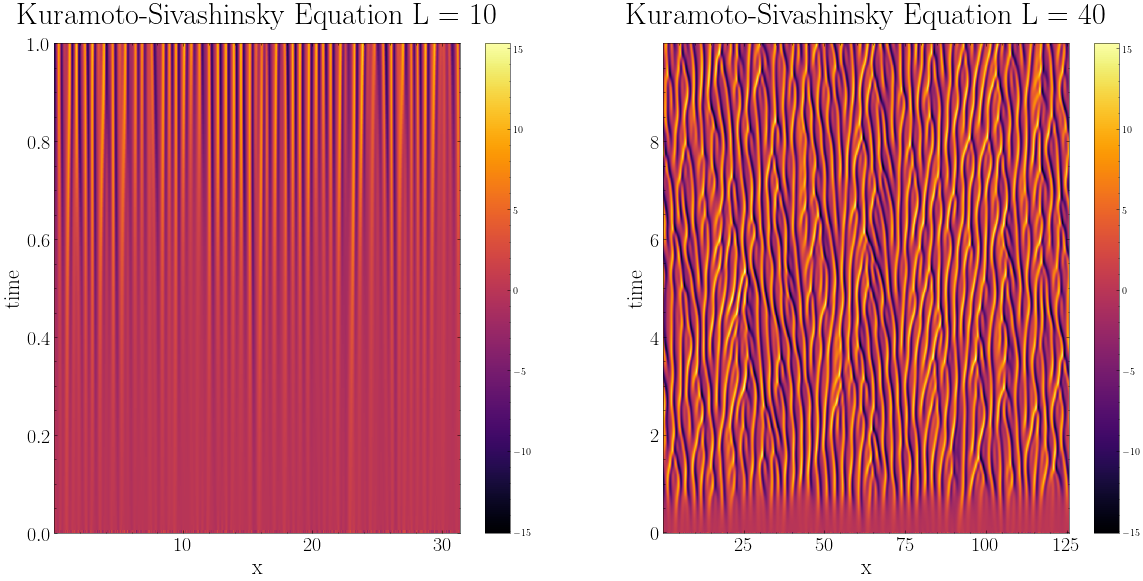

In [221]:
fig = plt.figure(figsize=(20, 9))
ax = plt.subplot(1,2,1)
XX, T = np.meshgrid(x1, t1)
im = ax.pcolormesh(XX,T, u1, cmap='inferno', rasterized=True)
ax.set_title('Kuramoto-Sivashinsky Equation L = 10', fontsize=30, pad = 20)
ax.set_ylabel('time', fontsize=22)
ax.set_xlabel('x', fontsize=22)
ax.set_ylim([0, 1])
ax.tick_params(axis='both', which='major', labelsize=20)
fig.colorbar(im)

ax = plt.subplot(1,2,2)
XX2, T2 = np.meshgrid(x2, t2)
im2 = ax.pcolormesh(XX2, T2, u2, cmap='inferno', rasterized=True)
ax.set_title('Kuramoto-Sivashinsky Equation L = 40', fontsize=30,  pad = 20)
ax.set_ylabel('time', fontsize=22)
ax.set_xlabel('x', fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=20)
fig.colorbar(im2)

plt.show()

In [222]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.22, random_state=69)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.22, random_state=69)

In [223]:
NN1 = keras.models.Sequential()
NN1.add(layers.Dense(10, input_dim = X_train1.shape[1], activation='sigmoid', name='Input'))
NN1.add(layers.Dense(10, activation='tanh', name = 'middle'))
NN1.add(layers.Dense(X_train1.shape[1], activation='linear', name = 'Output'))

NN1.compile(loss='mse', optimizer='adam')

History1 = NN1.fit(X_train1, y_train1, epochs=2000, verbose = 0) 

In [224]:
NN2 = keras.models.Sequential()
NN2.add(layers.Dense(10, input_dim = X_train2.shape[1], activation='sigmoid', name='Input'))
NN2.add(layers.Dense(10, activation='tanh', name = 'middle'))
NN2.add(layers.Dense(X_train2.shape[1], activation='linear', name = 'Output'))

NN2.compile(loss='mse', optimizer='adam')

History1 = NN2.fit(X_train2, y_train2, epochs=2000, verbose = 0) 

In [225]:
nn_pred1 = NN1.predict(u1)
nn_pred2 = NN2.predict(u2)

32/32 [==============================] - 0s 1ms/step


/home/tdinelli/anaconda3/envs/sindy/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().


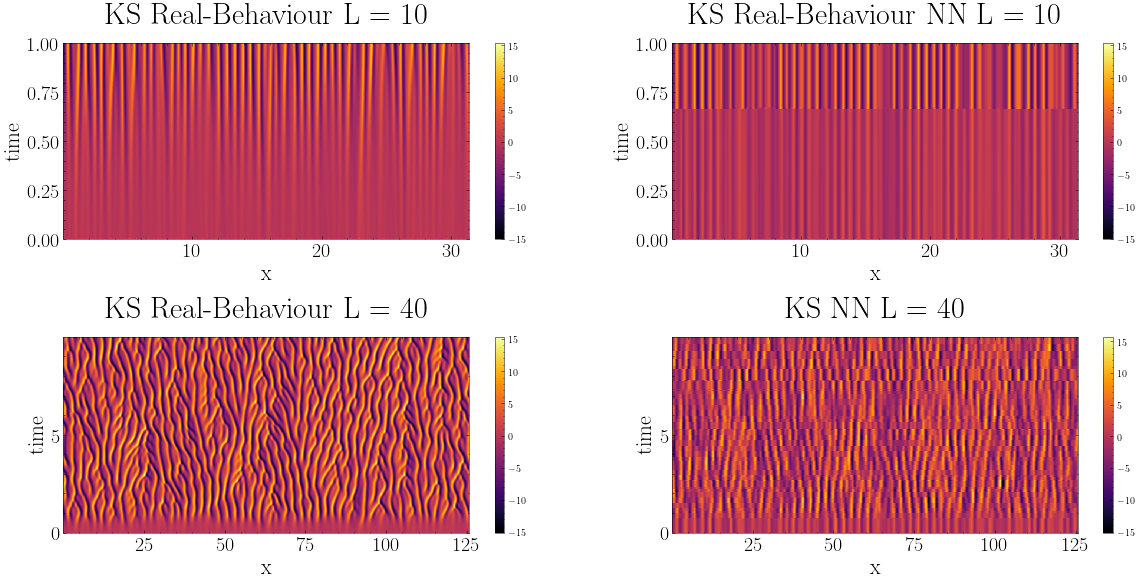

In [229]:
fig = plt.figure(figsize=(20, 9))
ax = plt.subplot(2,2,1)
XX, T = np.meshgrid(x1, t1)
im = ax.pcolormesh(XX,T, u1, cmap='inferno', rasterized=True)
ax.set_title('KS Real-Behaviour L = 10', fontsize=30, pad = 20)
ax.set_ylabel('time', fontsize=22)
ax.set_xlabel('x', fontsize=22)
ax.set_ylim([0, 1])
ax.tick_params(axis='both', which='major', labelsize=20)
fig.colorbar(im)

ax = plt.subplot(2,2,2)
XX, T = np.meshgrid(x1, t1)
im1 = ax.pcolormesh(XX,T, nn_pred1, cmap='inferno', rasterized=True)
ax.set_title('KS Real-Behaviour NN L = 10', fontsize=30, pad = 20)
ax.set_ylabel('time', fontsize=22)
ax.set_xlabel('x', fontsize=22)
ax.set_ylim([0, 1])
ax.tick_params(axis='both', which='major', labelsize=20)
fig.colorbar(im)

ax = plt.subplot(2,2,3)
XX2, T2 = np.meshgrid(x2, t2)
im2 = ax.pcolormesh(XX2, T2, u2, cmap='inferno', rasterized=True)
ax.set_title('KS Real-Behaviour L = 40', fontsize=30,  pad = 20)
ax.set_ylabel('time', fontsize=22)
ax.set_xlabel('x', fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=20)
fig.colorbar(im2)

ax = plt.subplot(2,2,4)
XX2, T2 = np.meshgrid(x2, t2)
im2 = ax.pcolormesh(XX2, T2, nn_pred2, cmap='inferno', rasterized=True)
ax.set_title('KS NN L = 40', fontsize=30,  pad = 20)
ax.set_ylabel('time', fontsize=22)
ax.set_xlabel('x', fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=20)
fig.colorbar(im2)

plt.subplots_adjust(hspace=0.5)

plt.show()